# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [3]:
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [5]:
# Method 1 - GROUPBY 

mean_salary = employee.groupby('Department')['Salary'].mean()
print(mean_salary)

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [6]:
# Method 2 - Pivot Tables 
employee.pivot_table(index=["Department"], values="Salary", aggfunc="mean")

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
# your answer here
employee.pivot_table(index=["Department","Title"], values="Salary", aggfunc="mean")

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
# your answer here
employee.pivot_table(index=["Years","Title"], values="Salary", aggfunc="mean")

Salary
Years Title            
1     analyst      35.0
2     analyst      30.0
      associate    55.0
3     associate    55.0
4     analyst      35.0
7     associate    60.0
8     VP           70.0

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [9]:
# your answer here

grouped_data = employee.groupby(['Department', 'Title'])[['Salary']].agg(['mean', 'count'])
grouped_data


Salary      
                       mean count
Department Title                 
HR         VP          70.0     1
           analyst     32.5     2
IT         VP          70.0     1
           analyst     32.5     2
           associate   60.0     1
Sales      associate   55.0     2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [10]:
# your answer here
pivot_table_result = employee.pivot_table(index=["Department","Title"], values="Salary", aggfunc=(['median', 'min', 'max', 'std']))
pivot_table_result

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
#your answer here 

std_salary = pivot_table_result.stack().std()

pivot_table_result_filled = pivot_table_result.fillna(std_salary)
pivot_table_result_filled

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  2.041241
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  2.041241
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  2.041241
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [12]:
grouped_data = employee.groupby('Department')[['Salary']].agg(['count', 'sum'])
grouped_data

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [13]:
# your answer here
grouped_data = employee.groupby(['Department', 'Title'])[['Years', 'Salary']].agg({'Years': 'sum', 'Salary': 'mean'})
grouped_data

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [14]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [15]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [16]:
# your answer here
import pandas as pd
import numpy as np
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [17]:
# your answer here
print(fitbit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [18]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [19]:
fitbit['Date'].count() #number of dates in my data frame


367

In [20]:
fitbit.isna().sum() #no null values

Date                      0
Calorie burned            0
Steps                     0
Distance                  0
Floors                    0
Minutes Sedentary         0
Minutes Lightly Active    0
Minutes Fairly Active     0
Minutes Very Active       0
Activity Calories         0
MinutesOfSleep            0
MinutesOfBeingAwake       0
NumberOfAwakings          0
LengthOfRestInMinutes     0
dtype: int64

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [21]:
# your answer here
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])

print(f"Pearson Correlation between Minutes Very Active and Steps: {correlation}")


Pearson Correlation between Minutes Very Active and Steps: 0.5714518481062609


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [22]:
import matplotlib.pyplot as plt

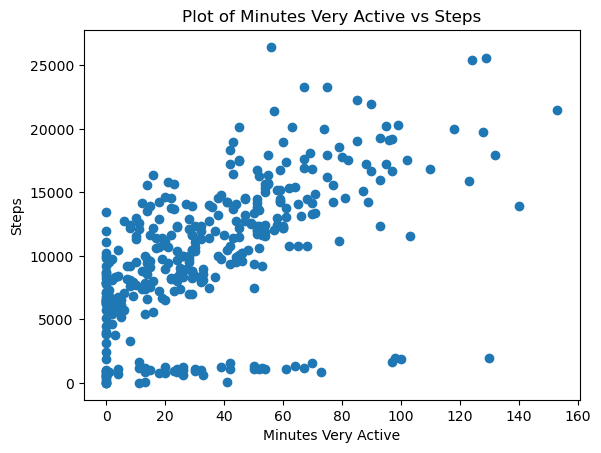

In [23]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Plot of Minutes Very Active vs Steps')

plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [24]:
# your answer here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [25]:
# your answer here
correlation2 = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

print(f"Pearson Correlation between Minutes Sedentary and Steps: {correlation2}")

Pearson Correlation between Minutes Sedentary and Steps: 0.07690608062990095


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

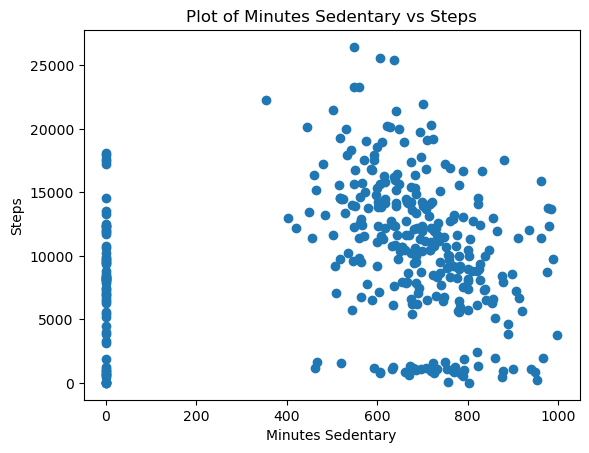

In [26]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Plot of Minutes Sedentary vs Steps')

plt.show()


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [27]:
# your answer here
correlation3 = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

print(f"Pearson Correlation between Minutes Of Sleep and Steps: {correlation3}")

Pearson Correlation between Minutes Of Sleep and Steps: 0.13098565950836383


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

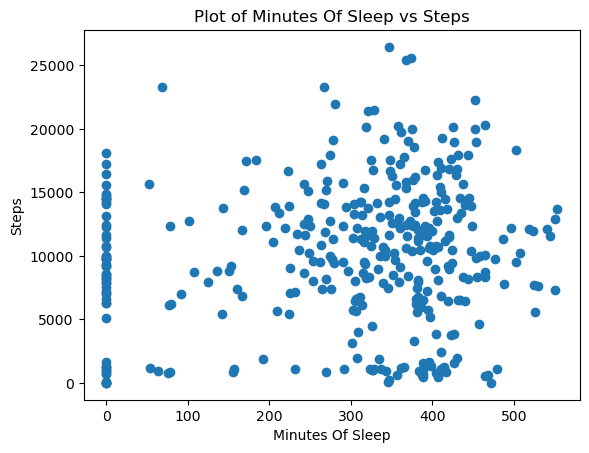

In [28]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.title('Plot of Minutes Of Sleep vs Steps')

plt.show()


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [29]:
# your answer here
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

subset_fitbit = fitbit[columns]

cor_fit = subset_fitbit.corr()
print(cor_fit)


                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [30]:
# your answer here
# Floors: 0.306511 and Minutes Very Active: 0.57812

In [31]:
correlation_steps = cor_fit['Steps']

correlation_steps_sorted = correlation_steps.sort_values(ascending=False)

print(correlation_steps_sorted)


Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [32]:
# your answer here
time_grades = pd.read_csv('time_grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

In [40]:
# your answer here
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

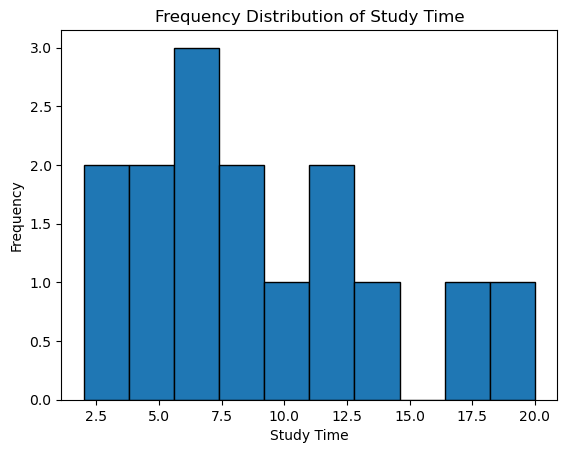

In [46]:
plt.hist(time_grades['Study time'], bins=10, edgecolor='black')
plt.title('Frequency Distribution of Study Time')
plt.xlabel('Study Time')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

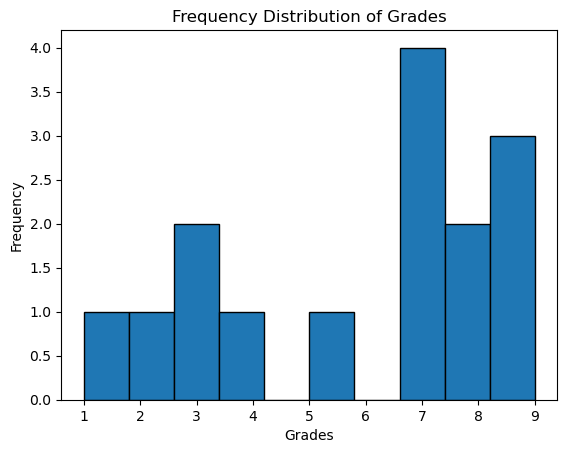

In [48]:
plt.hist(time_grades['Grade'], bins=10, edgecolor='black')
plt.title('Frequency Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [56]:
from scipy.stats import pearsonr, spearmanr

In [59]:
# your answer here - Pearson Correlation 
pearsonr(time_grades["Study time"], time_grades["Grade"])
#"Strong correlation"

PearsonRResult(statistic=0.7980456073578859, pvalue=0.0003627635256342719)

In [60]:
# your answer here - Spearman Correlation 
#display(time_grades["Study time"].sort_values(ascending=False))
#display(time_grades["Grade"].sort_values(ascending=False))

spearmanr(time_grades["Study time"], time_grades["Grade"])[0]

#"Strong" correlation

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

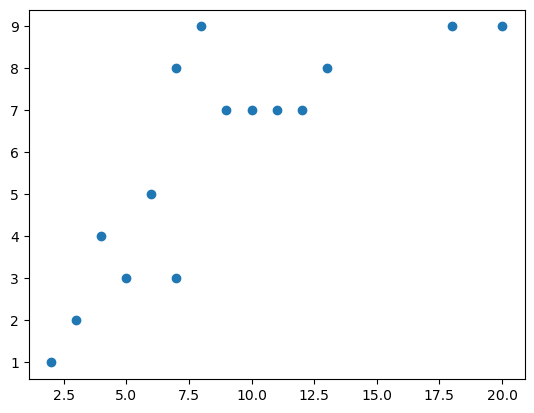

In [62]:
# your answer here
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [66]:
# your answer here